In [1]:
#import some tools that we will use
import skimage.io
import skimage.measure
import numpy
import matplotlib.pyplot as plt
import cellpose.plot
import generate_nuclear_segmentation

import models.labels
from pathlib import Path
from models.image_filename_glob import ImageFilenameGlob

In [17]:
#Define DAPI image you're starting with (maximally projected) and load it

DAPI_image_file = "/data/finne/20210723_Josh/Results/MIPs_and_z_centers/TIFs/DMSO6hrTreatment_2021_07_14__12_03_10/p2/ch3/zXX_maximum_projection.tif"
DAPI_image = skimage.io.imread(DAPI_image_file)

nuclear_mask_dir = "/data/finne/20210723_Josh/Results/nuclear_masks/"

In [20]:
#OPTION ONE: If you haven't already run anything, and want to check out a few diameters before you segment: 
# define path to image and create a segmentation job

nuclear_mask = generate_nuclear_segmentation.GenerateNuclearSegmentationJob(DAPI_image_file, nuclear_mask_dir, 100)
segmentation_result = nuclear_mask.cellpose_filtered

distinct_labels = models.labels.distinct_labels(segmentation_result)

>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 1 image(s)
time spent: running network 4.28s; flow+mask computation 3.99
estimated masks for 1 image(s) in 8.37 sec
>>>> TOTAL TIME 8.37 sec


In [ ]:
#OPTION TWO: If you've already run the segmentation and want to make sure the masks look reasonable: 
# Define image and segmentation result

nuclear_segmentation_file = "/data/finne/20210302_Reanalysis/Jupyter_test/nuclear_segmentations/AssayPlate_PerkinElmer_CellCarrier-384 Ultra_M16_T0001F003L01AXXZXXCXX_nuclear_segmentation.npy"


segmentation_result = numpy.load(nuclear_segmentation_file)

distinct_labels = models.labels.distinct_labels(segmentation_result)

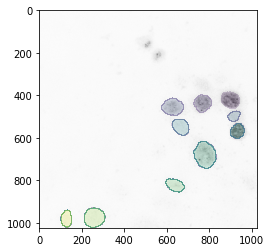

In [22]:
#display the things
plt.imshow(DAPI_image, cmap="Greys")
contour_result = plt.contourf(segmentation_result, levels=distinct_labels, alpha=0.2)
plt.show()

#print(len(distinct_labels))